In [18]:
# using Pkg
# Pkg.add("OrdinaryDiffEq")
using DynamicalSystems, Plots, OrdinaryDiffEq # accessing the ODE solvers

   Resolving package versions...
   Installed OrdinaryDiffEq ─ v6.77.1
    Updating `~/.julia/environments/v1.10/Project.toml`
  [1dea7af3] + OrdinaryDiffEq v6.77.1
    Updating `~/.julia/environments/v1.10/Manifest.toml`
  [1dea7af3] ↑ OrdinaryDiffEq v6.76.0 ⇒ v6.77.1
Precompiling project...
  ✓ OrdinaryDiffEq
  1 dependency successfully precompiled in 39 seconds. 422 already precompiled.
  1 dependency precompiled but a different version is currently loaded. Restart julia to access the new version


## Henon map

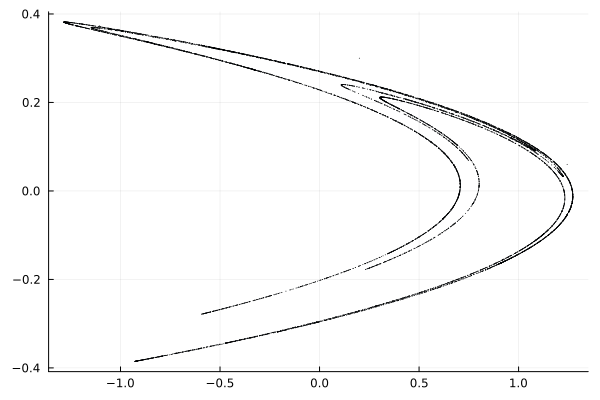

In [9]:
function henon_rule(u, p, n) # here `n` is "time", but we don't use it.
    x, y = u # system state
    a, b = p # system parameters
    xn = 1.0 - a * x^2 + y
    yn = b * x
    return SVector(xn, yn)
end

u0 = [0.2, 0.3] # initial condition
p0 = [1.4, 0.3] # parameter

henon = DeterministicIteratedMap(henon_rule, u0, p0)

total_time = 10000
X, t = trajectory(henon, total_time)

plot(X[:, 1], X[:, 2], seriestype=:scatter, markersize=0.1, legend=false)

## Lorenz 96

### discrete

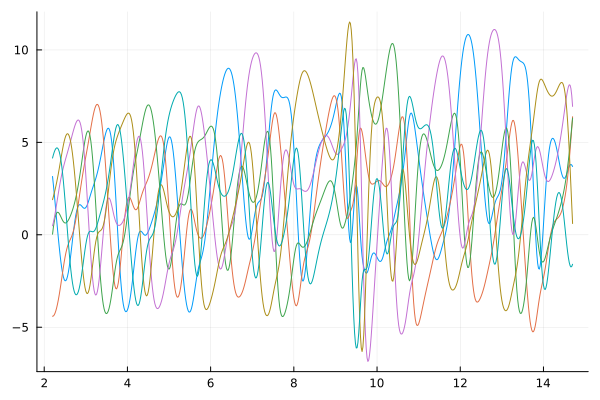

In [13]:
function lorenz96_rule!(du, u, p, t)
    F = p[1]
    N = length(u)
    # 3 edge cases
    du[1] = (u[2] - u[N-1]) * u[N] - u[1] + F
    du[2] = (u[3] - u[N]) * u[1] - u[2] + F
    du[N] = (u[1] - u[N-2]) * u[N-1] - u[N] + F
    # then the general case
    for n in 3:(N-1)
        du[n] = (u[n+1] - u[n-2]) * u[n-1] - u[n] + F
    end
    return nothing # always `return nothing` for in-place form!
end

N = 6 # number of variables
u0 = range(0.1, 1; length=N)# initial condition
p0 = [8.0] # parameter
lorenz96 = CoupledODEs(lorenz96_rule!, u0, p0) # create the system

total_time = 12.5 # total time
sampling_time = 0.02 # sampling time
Y, t = trajectory(lorenz96, total_time; Ttr=2.2, Δt=sampling_time) # simulate the system Ttr is the transient time, Δt is the sampling time

plt = plot()
for var in columns(Y)
    plot!(plt, t, var, label="")
end
display(plt)

### continuous

In [19]:
diffeq = (alg=Vern9(), abstol=1e-9, reltol=1e-9)
lorenz96_vern = ContinuousDynamicalSystem(lorenz96_rule!, u0, p0; diffeq)

Y, t = trajectory(lorenz96_vern, total_time; Ttr=2.2, Δt=sampling_time)
Y[end]

steps = 10000
lyapunovspectrum(lorenz96, steps)

6-element Vector{Float64}:
  0.9480080466096674
  0.0001261436476251105
 -0.15681592709523193
 -0.7477940143296298
 -1.406615756870544
 -4.636905163494464